In [110]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import yfinance as yf
import datetime

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [111]:
# Set start and end time
end_time = datetime.datetime.now()
start_time = datetime.datetime(end_time.year-5, end_time.month, end_time.day)

In [112]:
# Importing data of AAPL stock from yahoo finance
data = yf.download('AAPL', start_time, end_time)

[*********************100%***********************]  1 of 1 completed


In [113]:
# Showing past 30 days of AAPL stock
data.tail(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-30,176.960007,178.990005,176.570007,177.300003,177.300003,55964400
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.250000,99625300
2023-06-01,177.699997,180.119995,176.929993,180.089996,180.089996,68901800
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600
2023-06-08,177.899994,180.839996,177.460007,180.570007,180.570007,50214900
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.960007,48870700


In [114]:
# Showing different parameters in data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,110.321497,111.648398,109.090580,110.434662,109.076509,1.099786e+08
std,46.348378,46.879184,45.854761,46.395104,46.708583,5.490768e+07
min,35.994999,36.430000,35.500000,35.547501,34.209961,3.145820e+07
25%,57.558125,58.157501,56.868751,57.370625,55.735682,7.446538e+07
50%,124.309998,125.634998,122.629997,124.505001,122.765755,9.516830e+07
75%,148.970001,150.655003,147.664993,149.254997,148.175354,1.295470e+08
max,193.779999,194.479996,191.759995,193.970001,193.970001,4.265100e+08


Text(0.5, 1.0, 'Closing Price of AAPL')

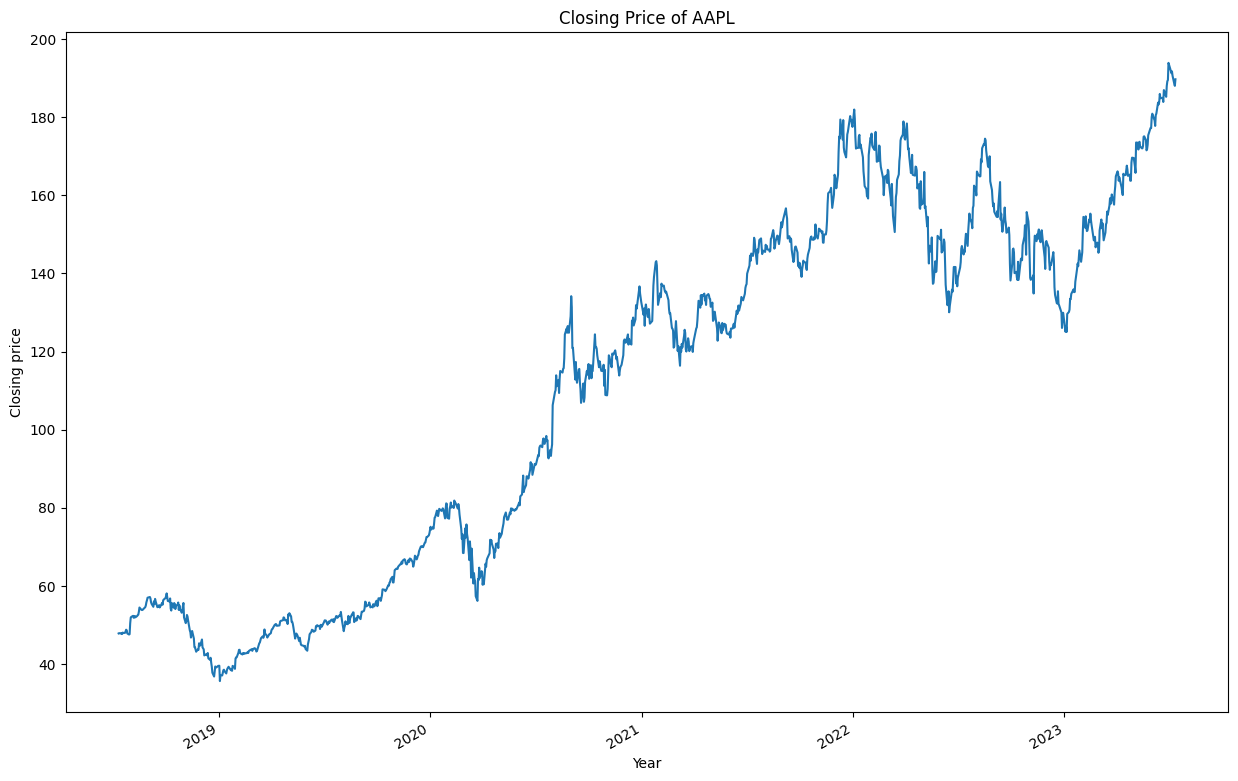

In [115]:
plt.figure(figsize=(15, 10))
data['Close'].plot()
plt.ylabel('Closing price')
plt.xlabel('Year')
plt.title("Closing Price of AAPL")

In [116]:
# Taking out Close price from data for training
df = data.filter(['Close'])
dataset = df.values

print(dataset)

[[ 47.75749969]
 [ 47.83250046]
 [ 47.72750092]
 ...
 [188.61000061]
 [188.08000183]
 [189.77000427]]


In [117]:
# Use 95% of the data for training
train_len = int(np.ceil(len(dataset) * .95))

print(train_len)

1196


In [118]:
# Scaling the values in dataset to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.07707238]
 [0.0775458 ]
 [0.07688302]
 ...
 [0.96616642]
 [0.96282094]
 [0.97348863]]


In [119]:
# Defining the train data
train_data = scaled_data[0:int(train_len), :]
print(train_data)

[[0.07707238]
 [0.0775458 ]
 [0.07688302]
 ...
 [0.79838721]
 [0.79062319]
 [0.78620464]]


In [120]:
# Building training lists
x_train = []
y_train = []

# Predicting close price using the previous 100 (working) days
for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [122]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1096/1096 [==============================] - 82s 71ms/step - loss: 0.0031


In [123]:
# Defining the test data
test_data = scaled_data[train_len - 100: , :]
x_test = []
y_test = dataset[train_len:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i - 100:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [124]:
# Predicting the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


# Finding the root mean squared error
error = np.sqrt(np.mean(((predictions - y_test)**2)))
print(error)

2/2 [==============================] - 1s 111ms/step
2.564617709804592


<ipython-input-125-f10b96d2af77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


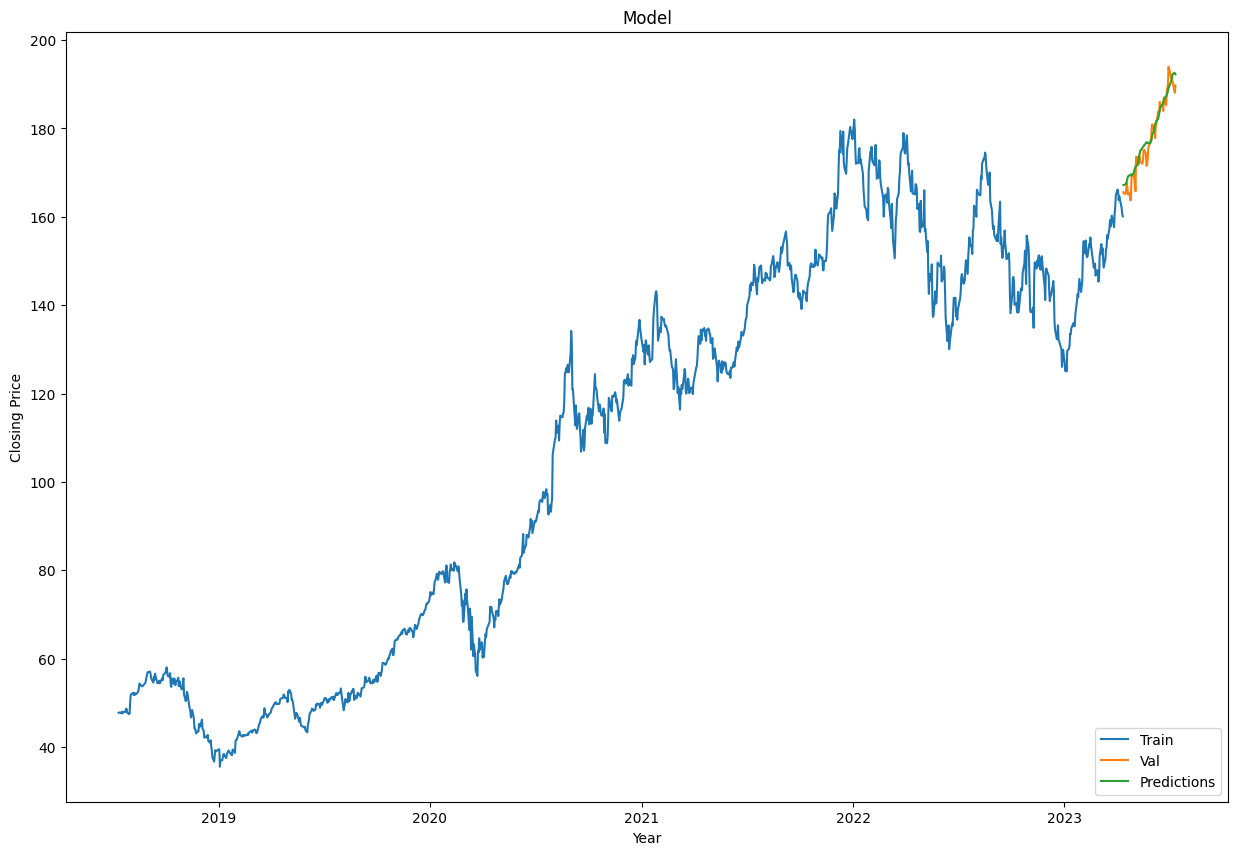

In [125]:
# Plotting the prediction
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(15,10))
plt.title('Model')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

Insights and Key findings:

In this report, we tried to predict the stock price of AAPL using LSTM model with layers of 128, 64, 25, 1 nodes. Using these layers, we were able to predict the stock price of AAPL for the final 5% of time (for a time length of 5 years). 

The prediction would be very good for investment purposes and would imply the investor to long in that position to be able to profit, which as the figure shows would be the correct position. 

This can definitely be used for other stocks or bonds and would be beneficial for investing or making robo-advisors. 

Next steps:

Next steps for this model would be to use more layers of LSTM or RNN (or other layers) to be able to have a better prediction of the stock price. Also this model can definitely be used for other commodities or securities. 

Another direction would be to consider more epochs for training which would give a better result usually (e.g. I have tried 10 epochs and 80% of training data and it was able to give a pretty good prediction of stock price)